<a href="https://colab.research.google.com/github/royn5618/EP_23_Intro_to_ML_Workshop/blob/main/Notebooks/Linear_Regression_California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [27]:
from sklearn.datasets import fetch_california_housing

df = fetch_california_housing(as_frame=True, return_X_y=False)['frame']

# Explore Data

## Basic Data Info

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**Observations**
- the dataset contains 20,640 samples and 8 features

- all features are numerical features encoded as floating number

- there are no missing values*

*But there could be data anomalies.

## Scan Few Data Points

In [29]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [30]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Univariate Analysis

Analyzing the range, value concentration and outliers for each variable.

In [32]:
geog_columns =  ['longitud', 'latitude']
numeric_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                   'Population',	'AveOccup']

target_column = 'MedHouseVal'

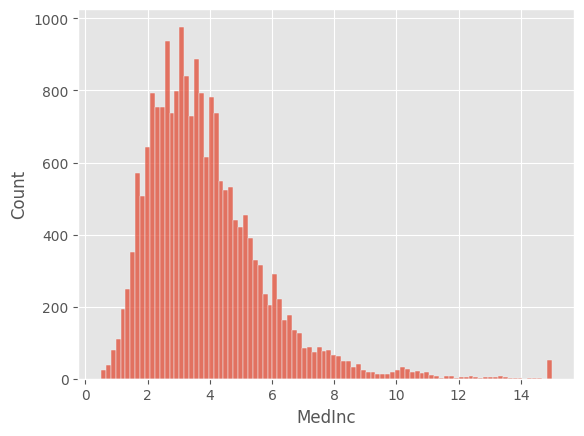

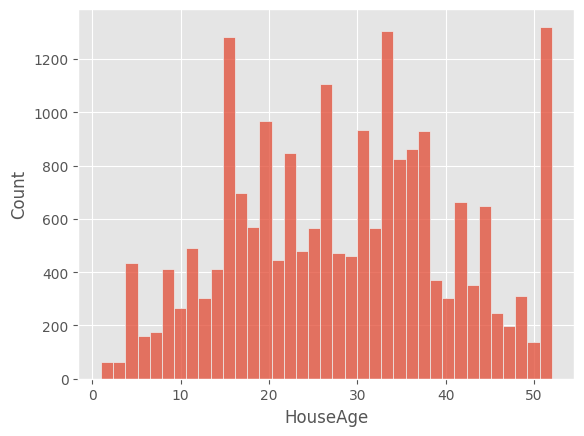

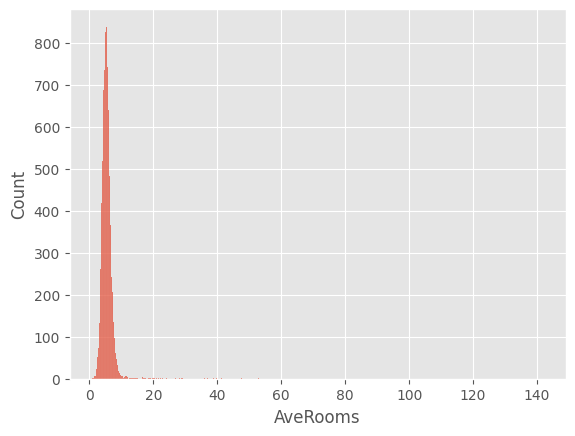

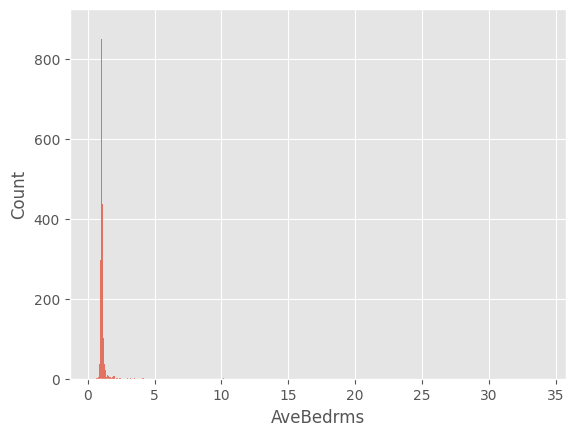

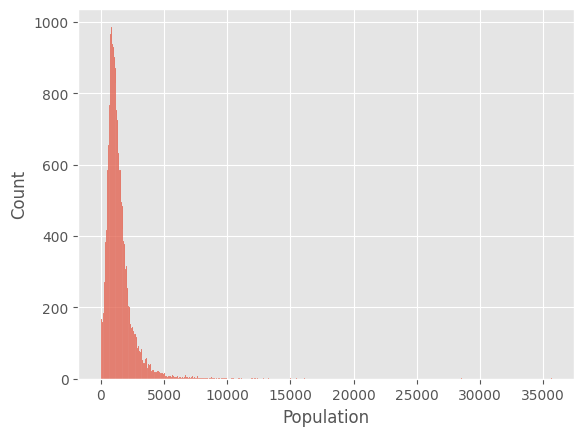

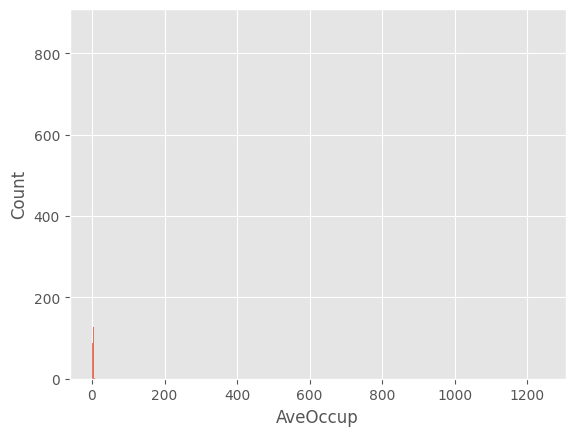

In [35]:
for each_col in numeric_columns:
  sns.histplot(df[each_col], bins=30)
  plt.show()

**Observations**

- The median income is a distribution with a long tail. It means that the salary of people is more or less normally distributed but there is some people getting a high salary.

- Regarding the average house age, the distribution is more or less uniform

- 'AveRooms', 'AveBedrms','Population',	'AveOccup' have extreme values i.e. they potentially has outliers.

# Target Analysis

Here, instead of using histogram, we are using a box plot.

<Axes: xlabel='MedHouseVal'>

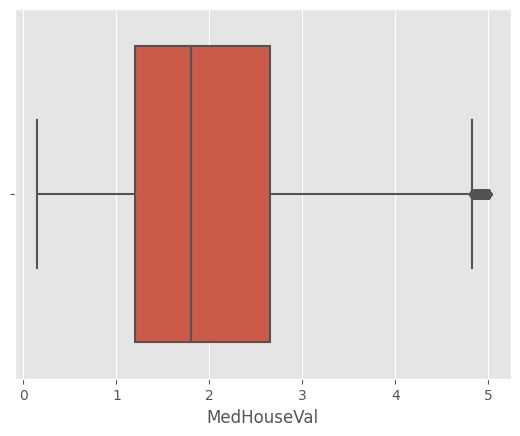

In [46]:
sns.boxplot(x=df[target_column])

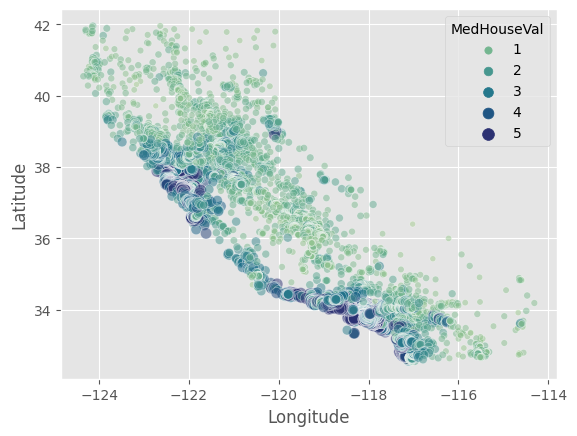

In [48]:
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    size=target_column,
    hue=target_column,
    palette='crest',
    alpha=0.5,
)

plt.show()

<Axes: xlabel='Longitude', ylabel='Latitude'>

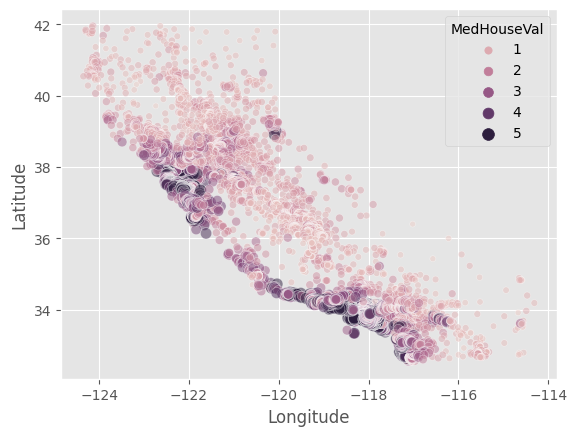

In [38]:
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    alpha=0.5,
)

**Observations:**

- The high-valued houses are mostly located on the coastline, around the big cities of San Diego, Los Angeles, San Jose, or San Francisco.

# Bivariate Correlation Analysis

In this section, only two columns - AveBedrms and AveRooms are selected to demonstrate fitting of a linear regression line.

In [49]:
lin_reg_cols= ['AveBedrms', 'AveRooms']

We will use a scatteplot here to analyse the nature of their correlation.

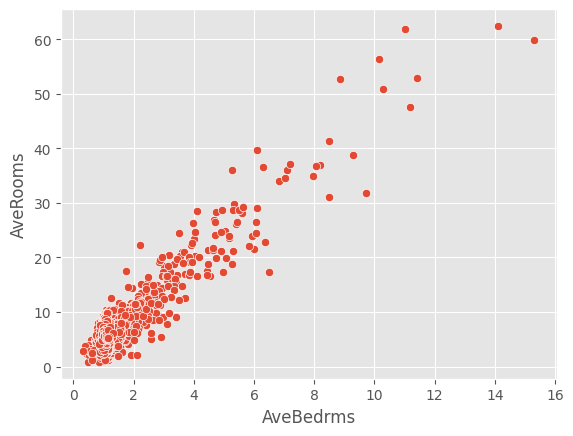

In [54]:
df_lin_reg = df[df[lin_reg_cols[0]] < 20][lin_reg_cols]
sns.scatterplot(df_lin_reg, # selecting AveRooms upto 20 for a closer look
                x=lin_reg_cols[0],
                y=lin_reg_cols[1]
                )

plt.show()